In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [2]:
# Pull Crime Data file
file_to_load = "2010-2019_Crime.csv"

# Read Crime Data File
crime_df = pd.read_csv(file_to_load)
# crime_df

In [3]:
# Pull Community file
comm_file = "Chicago_Communities.csv"

# Read Chicago Community File 
comm_df = pd.read_csv(comm_file)
comm_df
# # Rename Columns with spaces
comm_df.rename(columns={'City Area': 'City_Area'}, inplace =True)
# comm_df

In [4]:
# Calclate the Grand Total # of Crimes and the % that the specified crime categories account for

grand_total = crime_df["Crimes"].sum()
grand_total
violent_crimes = round(((crime_df["Violent"].sum())/grand_total)*100).astype(str) + "%"
# violent_crimes
gun_crimes = round(((crime_df["Gun_Violence"].sum())/grand_total)*100).astype(str) + "%"
# gun_crimes
robbery_crimes = round(((crime_df["Robbery"].sum())/grand_total)*100).astype(str) + "%"
# robbery_crimes
vandalism_crimes = round(((crime_df["Vandalism"].sum())/grand_total)*100).astype(str) + "%"
# vandalism_crimes
fraud_crimes = round(((crime_df["Fraud"].sum())/grand_total)*100).astype(str) + "%"
fraud_crimes
drug_crimes = round(((crime_df["Drug_Abuse"].sum())/grand_total)*100).astype(str) + "%"
drug_crimes
sex_crimes = round(((crime_df["Sexual"].sum())/grand_total)*100).astype(str) + "%"
sex_crimes
crime_count_data = {'Total Reported Crimes': [grand_total],
                    'Total Violent Crimes':[violent_crimes],
                    'Total Vandalism Crimes':[vandalism_crimes],
                    'Total Drug Crimes': [drug_crimes],
                    'Total Robbery Crimes': [robbery_crimes],
                    'Total Fraudulent Crimes' : [fraud_crimes],
                    'Total Gun Violence Crimes': [gun_crimes],
                    'Total Sex Crimes': [sex_crimes]}

decade_crimes_df = pd.DataFrame(crime_count_data)

# Export DataFrame to CSV
decade_crimes_df.to_csv('decade_crime_count.csv')

decade_crimes_df

# # # # These crime types account for ~55% of Chicago crimes.  
# # # # Other crimes include non-violent theft, burglary, criminal trespassing, liquor violations, gambling, etc.

,Total Reported Crimes,Total Violent Crimes,Total Vandalism Crimes,Total Drug Crimes,Total Robbery Crimes,Total Fraudulent Crimes,Total Gun Violence Crimes,Total Sex Crimes
0,2966918,25.0%,10.0%,9.0%,4.0%,4.0%,3.0%,1.0%


In [5]:
# Create DataFrame to calculate annual crimes per year
crime_type_df = crime_df.filter(['Year',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# GroupBy Year
group_year = crime_type_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(group_year["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(group_year["Gun_Violence"].sum())
gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(group_year["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(group_year["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(group_year["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(group_year["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(group_year["Sexual"].sum())
# sexual_crimes

In [6]:
# Merge Crime Calculations
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, robbery_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, vandalism_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, fraud_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, drug_crimes, on='Year')
merge_table5

crime_type_totals = pd.merge(merge_table5, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
# crime_type_totals

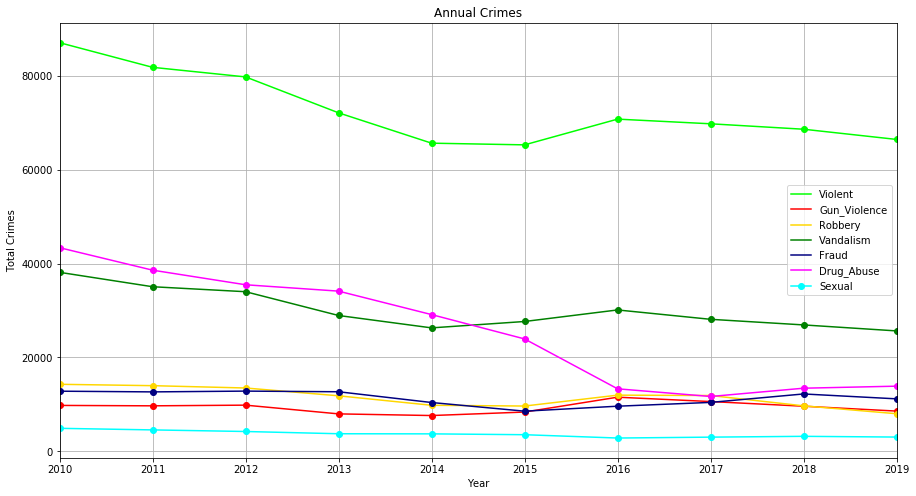

In [7]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('grand_total_annual_crimes.png')

plt.show()

# 2013-2015 show a progressive decrease in crimes in almost all categories

In [8]:
# INPUT community name to create a modified line graph of annual community crimes
community = input("What part of Chicago do you want to look into? ")

What part of Chicago do you want to look into?  Austin


In [9]:
# Create a variable for city Areas and Neighborhoods
area = comm_df.loc[comm_df["Community"] == community]['City_Area']
# type(area)
area = area.values
area = area[0]
# area type was originally a series so ".values" was used to pull an individual value from that series

neighborhoods = comm_df.loc[comm_df["Community"]== community]['Neighborhood']
neighborhoods = neighborhoods.values
# Print neighborhoods without brackets and separated by commas
neighborhoods = (', '.join(neighborhoods))

# Use ".loc" to create a DataFrame adjusted based on the area
area_pcnt = crime_df.loc[crime_df["Area"]== area]
area_pcnt

# Calculate % of Grand Total Crimes in that area 2010-2019
grand_total = crime_df["Crimes"].sum()
area_crime_pcnt = round(((area_pcnt["Crimes"].sum())/grand_total)*100).astype(str) + "%"
area_crime_pcnt
total_area_crimes = area_pcnt["Crimes"].sum()
total_area_crimes

# # Calculate % of Grand Total Crimes in that Community 2010-2019
# Use ".loc" to create a DataFrame adjusted based on the INPUT community
input_df = area_pcnt.loc[area_pcnt["Area"]== area]
area_pcnt



# # Provide the city area and list of neighborhoods in the input community
print(f"{community} is in the {area} area, including the following neighborhoods: {neighborhoods}. The {area} area accounts for ~{area_crime_pcnt} of City Crimes over the last decade, totaling {total_area_crimes} out of {grand_total}.")

Austin is in the West Side area, including the following neighborhoods: Galewood, The Island. The West Side area accounts for ~25.0% of City Crimes over the last decade, totaling 747097 out of 2966918.


In [10]:
# Create DataFrame to calculate annual crimes for the Area that the input Community is located 
area_crime_df = crime_df.filter(['Year',
                                 'Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

area_crime_df

# Use ".loc" to create a DataFrame adjusted based on the INPUT community
input_df = area_crime_df.loc[crime_df["Area"]== area]
input_df

# GroupBy Year
year_group = input_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# # Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# # sexual_crimes

In [11]:
# Merge Crime Calculation DataFrames
m_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
m_table1

m_table2 = pd.merge(m_table1, robbery_crimes, on='Year')
m_table2

m_table3 = pd.merge(m_table2, vandalism_crimes, on='Year')
m_table3

m_table4 = pd.merge(m_table3, fraud_crimes, on='Year')
m_table4

m_table5 = pd.merge(m_table4, drug_crimes, on='Year')
m_table5

# Final Community DataFrame
area_crime_totals = pd.merge(m_table5, sexual_crimes, on='Year')
area_crime_totals = area_crime_totals.reset_index()
# area_crime_totals

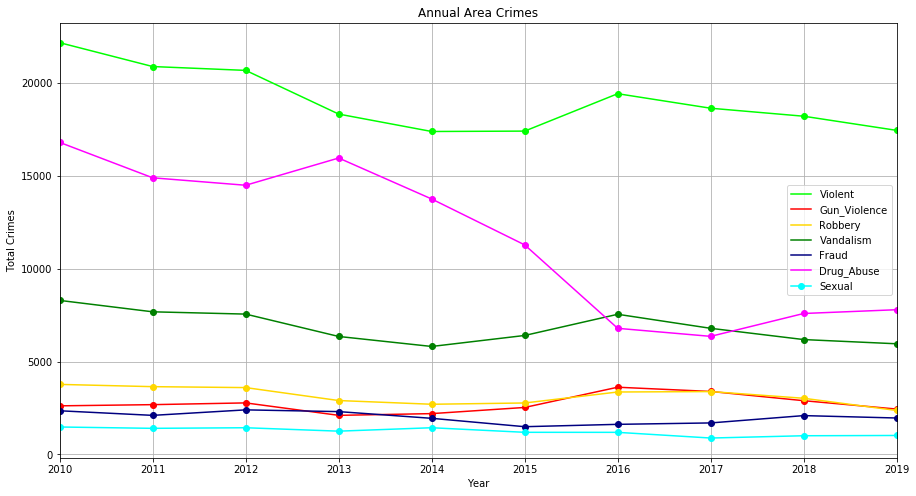

In [12]:
# Graph Crime Totals

ax = plt.gca()

area_crime_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
area_crime_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Area Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('annual_community_crimes.png')

plt.show()

In [13]:
# Annual Gun Violence: 
# Top 9 communities with over 3,400 Gun Violence Crimes between 2010-2019



# Filter Master DataFrame by Top 9 Communities
gun_violence_df = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]
# gun_violence_df

# Filter Relevant Columns
gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Pivot Table to reformat the DataFrame
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

# Rename Columns with spaces
gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
# gun_violence_df

#These neighborhoods account for 40% of total gun violence crimes over the last decade.  Austin is significantly
# higher than all other communities, individually totaling nearly 9% of gun violence crimes.  All remaing 
# communities are 4% or less.


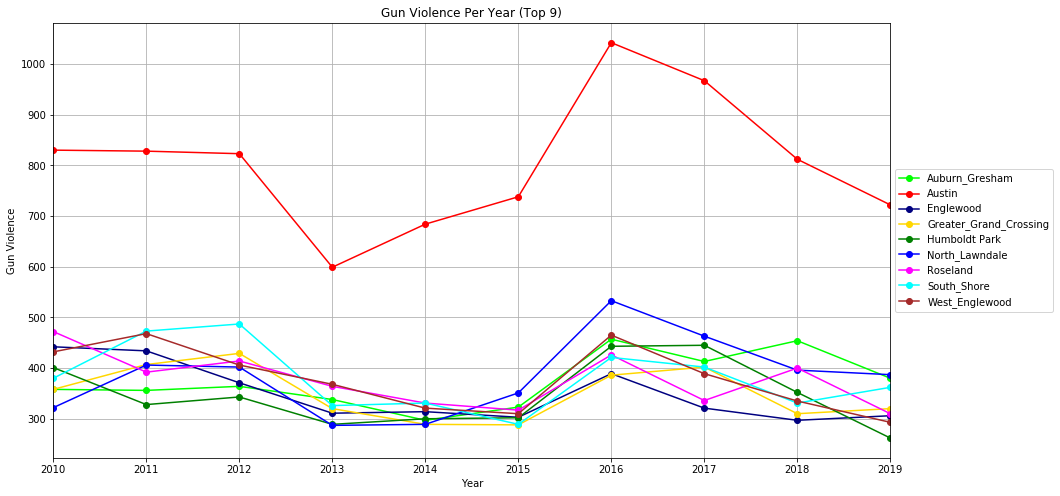

In [14]:
# Build Gun Violence Line Graph

# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")

# Legend Names & Relocate outside of graph
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('annual_gun_violence.png')

plt.show()

In [15]:
# Violent Crimes vs # of Arrests

# Build DataFrame
arrest_df = crime_df.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that are >1 under the 'Violent' column
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Merge Violent_Crimes and Arrests DataFrames
arrest_pcnt = pd.merge(violent_crimes, arrests, on = 'Year')
arrest_pcnt ['Arrest_Pcnt'] = round((arrest_pcnt['Arrests']/arrest_pcnt['Violent'])*100,0)
arrest_pcnt['No_Arrests_Pcnt'] = round(((arrest_pcnt['Violent'] - arrest_pcnt['Arrests'])/arrest_pcnt['Violent'])*100,0) 
arrest_pcnt = arrest_pcnt.reset_index()
arrest_pcnt.to_csv('arrest_pcnt.csv')
# arrest_pcnt

In [16]:
# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "No_Arrests","Arrests"])
# v_crime_arrests

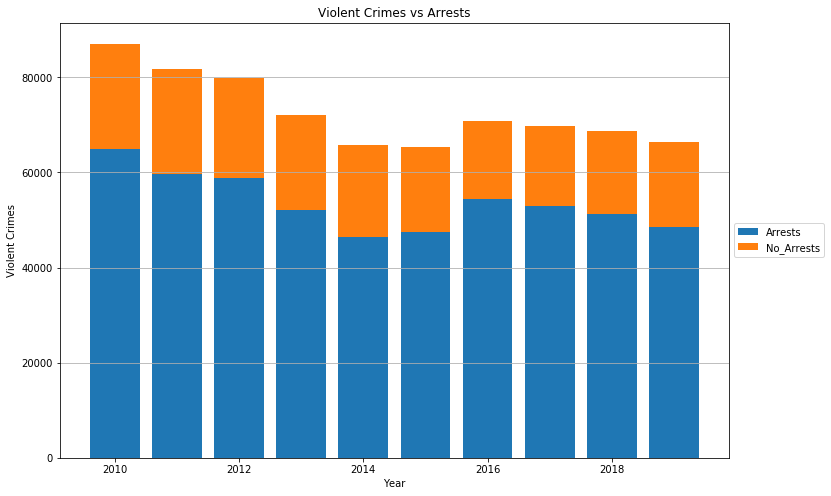

In [17]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")

# Legend Names & Relocate outside of graph
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('v_crime_arrests.png')

plt.show()

In [18]:
# Calculate areas with the highest types of crimes

area_crimes_df = crime_df.filter(['Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Weapon',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])
area_crimes_df

# GroupBy Area
area_group = area_crimes_df.groupby(['Area'])

# Calculate Violent Crimes
v_crimes = pd.DataFrame(area_group["Violent"].sum())
v_crimes
# Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(area_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(area_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(area_group["Vandalism"].sum())
# vandalism_crimes
# Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(area_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(area_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sex_crimes = pd.DataFrame(area_group["Sexual"].sum())
# sexual_crimes

# area_crimes_df


In [19]:
# Merge Crime Calculations
table1 = pd.merge(v_crimes, gun_crimes, on='Area')
table1

table2 = pd.merge(table1, robbery_crimes, on='Area')
table2

table3 = pd.merge(table2, vandalism_crimes, on='Area')
table3

table4 = pd.merge(table3, fraud_crimes, on='Area')
table4

table5 = pd.merge(table4, drug_crimes, on='Area')
table5

crimes_per_area = pd.merge(table5, sex_crimes, on='Area')
crimes_per_area= crimes_per_area.reset_index()
crimes_per_area.to_csv('area_crimes.csv')
# crimes_per_area

In [20]:
# Highlight Areas with the Max Amount of Crimes per Type

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [21]:
crimes_per_area.style.apply(highlight_max)

,Area,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,Central,32227,1697,6109,10566,22247,4624,1829
1,Far North Side,54681,4118,7447,27349,13793,14048,2583
2,Far Southeast Side,98273,14909,14294,40577,9305,25881,3739
3,Far Southwest Side,48212,7307,7465,21439,5640,13983,1661
4,North Side,37110,3369,7417,21076,12106,5515,1568
5,Northwest Side,38236,3616,4763,20049,6810,8706,2059
6,Southside,112137,15147,18282,43213,10841,29031,3907
7,Southwest Side,116088,16075,17193,48077,12569,39481,6992
8,West Side,190541,27263,31542,68579,19981,115699,12319


In [22]:
# Filter Community list by West Side and Central Areas to Identify Communities and Areas in those Areas

max_crime_locations = comm_df[(comm_df.City_Area == 'West Side')|
                        (comm_df.City_Area == 'Central')]
max_crime_locations               

,Community #,City_Area,Community,Neighborhood
0,8,Central,Near North Side,Cabrini-Green
1,8,Central,Near North Side,The Gold Coast
2,8,Central,Near North Side,Goose Island
3,8,Central,Near North Side,Magnificent Mile
4,8,Central,Near North Side,Old Town
5,8,Central,Near North Side,River North
6,8,Central,Near North Side,River West
7,8,Central,Near North Side,Streeterville
8,32,Central,Loop,Loop
9,32,Central,Loop,New Eastside
